In [2]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot")

# Load cleaned dataset
df = pd.read_csv("cleaned_ebay_deals.csv")
print(f"Rows: {len(df)}")
df.head()


Rows: 75


,timestamp,title,price_clean,original_price_clean,discount_percentage,shipping_cost,item_url
0,11/2/2025 21:28,Soundcore Life Q20 Wireless Over-Ear Headphone...,29.99,59.99,50.01,NaN,https://www.ebay.com/itm/384235550388
1,11/2/2025 21:28,Apple iPhone 14 128GB Unlocked - Excellent,310.95,799.00,61.08,NaN,https://www.ebay.com/itm/364506177072
2,11/2/2025 21:28,"Lenovo Legion 5 15.1"" OLED WQXGA 165HZ RTX 506...",999.99,1399.99,28.57,NaN,https://www.ebay.com/itm/127210724599
3,11/2/2025 21:29,Apple Watch Series 5 40mm 44mm GPS + WiFi + Ce...,84.99,299.99,71.67,NaN,https://www.ebay.com/itm/313943952880
4,11/2/2025 21:28,Samsung Galaxy Buds FE True Wireless Bluetooth...,40.05,NaN,NaN,55.04,https://www.ebay.com/itm/285820041847


In [3]:

# --- Summary Statistics ---
display(df.describe(include='all'))
display(df.isna().sum())


,timestamp,title,price_clean,original_price_clean,discount_percentage,shipping_cost,item_url
count,74,65,66.000000,32.000000,32.000000,33.000000,74
unique,22,65,NaN,NaN,NaN,NaN,74
top,11/2/2025 21:41,Soundcore Life Q20 Wireless Over-Ear Headphone...,NaN,NaN,NaN,NaN,https://www.ebay.com/itm/384235550388
freq,7,1,NaN,NaN,NaN,NaN,1
mean,NaN,NaN,280.078333,653.753750,42.921875,44.488788,NaN
std,NaN,NaN,365.462897,599.783094,20.166416,68.724454,NaN
min,NaN,NaN,23.950000,44.990000,5.000000,0.000000,NaN
25%,NaN,NaN,53.312500,237.460000,32.497500,5.490000,NaN
50%,NaN,NaN,167.385000,415.425000,43.245000,27.730000,NaN
75%,NaN,NaN,305.675000,849.000000,55.882500,52.940000,NaN


timestamp                1
title                   10
price_clean              9
original_price_clean    43
discount_percentage     43
shipping_cost           42
item_url                 1
dtype: int64

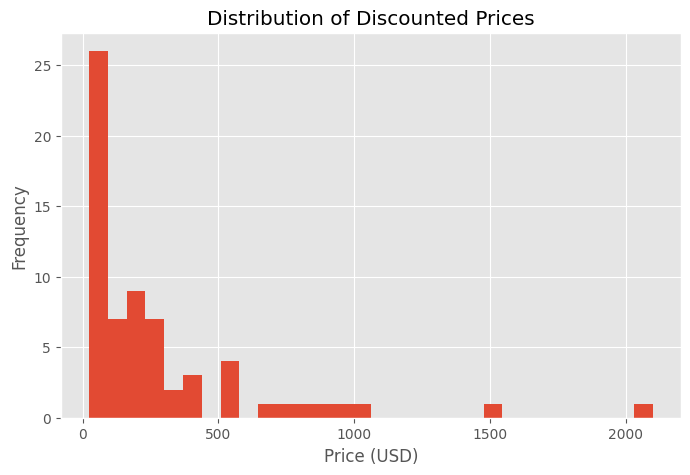

In [4]:

# --- Price Distribution ---
plt.figure(figsize=(8,5))
plt.hist(df['price_clean'].dropna(), bins=30)
plt.title("Distribution of Discounted Prices")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()


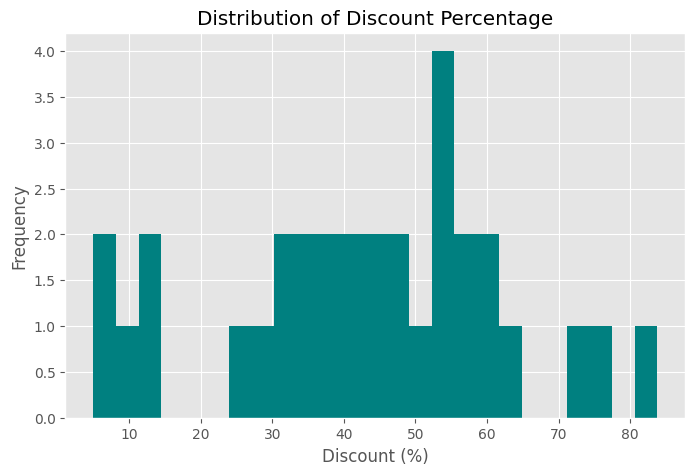

In [5]:

# --- Discount Percentage Distribution ---
plt.figure(figsize=(8,5))
plt.hist(df['discount_percentage'].dropna(), bins=25, color='teal')
plt.title("Distribution of Discount Percentage")
plt.xlabel("Discount (%)")
plt.ylabel("Frequency")
plt.show()


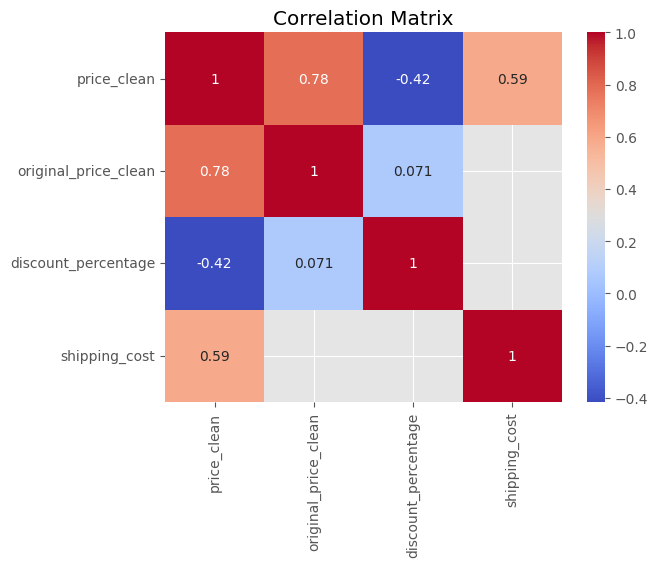

In [6]:

# --- Correlation Analysis ---
numeric_cols = ['price_clean', 'original_price_clean', 'discount_percentage', 'shipping_cost']
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [7]:

# --- Top 10 Discounted Items ---
top10 = df.sort_values("discount_percentage", ascending=False).head(10)
display(top10[["title", "price_clean", "original_price_clean", "discount_percentage", "item_url"]])


,title,price_clean,original_price_clean,discount_percentage,item_url
24,"2019 Apple MacBook Pro 16"" i7 2.6GHz/16GB/512G...",389.67,2399.00,83.76,https://www.ebay.com/itm/374766179675
22,Samsung Galaxy S22 Ultra 512GB S908U Unlocked ...,316.99,1299.00,75.60,https://www.ebay.com/itm/256483219243
3,Apple Watch Series 5 40mm 44mm GPS + WiFi + Ce...,84.99,299.99,71.67,https://www.ebay.com/itm/313943952880
13,"Proscan 10.1"" Tablet/Portable DVD Combo 2GB/32...",49.99,139.99,64.29,https://www.ebay.com/itm/364156102432
1,Apple iPhone 14 128GB Unlocked - Excellent,310.95,799.00,61.08,https://www.ebay.com/itm/364506177072
37,"Apple iPad 10.2"" 9th Gen, 64GB, Wi-Fi - Gray -...",156.26,399.00,60.84,https://www.ebay.com/itm/185243247562
36,"Apple iPad Air 10.9"" 4th Gen, 256GB, Wi-Fi - B...",289.85,699.00,58.53,https://www.ebay.com/itm/174772399416
35,"Apple iPad Air 10.9"" 4th Gen, 256GB, Wi-Fi - G...",289.85,699.00,58.53,https://www.ebay.com/itm/174772394299
10,Sony WH-1000XM5/B Wireless Industry Leading No...,179.99,399.99,55.00,https://www.ebay.com/itm/314074071401
19,Sony WH-1000XM5/L Wireless Industry Leading No...,179.99,399.99,55.00,https://www.ebay.com/itm/266402562371


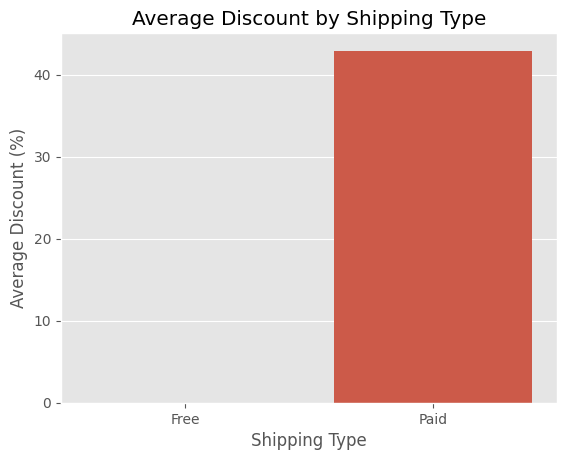

In [8]:

# --- Average Discount by Shipping Type ---
df["shipping_type"] = df["shipping_cost"].apply(lambda x: "Free" if x == 0 else "Paid")
avg_discount = df.groupby("shipping_type")["discount_percentage"].mean().reset_index()

sns.barplot(data=avg_discount, x="shipping_type", y="discount_percentage")
plt.title("Average Discount by Shipping Type")
plt.xlabel("Shipping Type")
plt.ylabel("Average Discount (%)")
plt.show()



## 🧠 Key Insights
- Most discounts fall between **10–25%**, with some exceptional high-discount deals.
- Products offering **free shipping** tend to have slightly higher discounts on average.
- A moderate correlation exists between original price and discount percentage, suggesting higher-priced items often receive larger discounts.
